In [42]:
import sys
import random
import pickle

sys.path.append('..')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

from scipy import stats

%matplotlib inline
rng = np.random.RandomState()

In [2]:
sys.path.append('../src')
from data_scripts import read_data, create_graphs
from bookkeeping import convert_LMG, decompose
from update_grammar import update_grammar

In [3]:
dataname = 'fb-messages'

# experiment sequential

In [26]:
with open(f'../results/experiment_sequential/{dataname}_base.grammars', 'rb') as infile:
    base_grammars = pickle.load(infile)
with open(f'../results/experiment_sequential/{dataname}_joint.grammars', 'rb') as infile:
    joint_grammars = pickle.load(infile)
with open(f'../results/experiment_sequential/{dataname}_indep.grammars', 'rb') as infile:
    indep_grammars = pickle.load(infile)

In [19]:
with open(f'../results/experiment_sequential/{dataname}_joint.lls', 'rb') as infile:
    joint_lls = pickle.load(infile)
with open(f'../results/experiment_sequential/{dataname}_indep.lls', 'rb') as infile:
    indep_lls = pickle.load(infile)

In [20]:
with open(f'../results/experiment_sequential/{dataname}_base.mdls', 'rb') as infile:
    base_mdls = pickle.load(infile)
with open(f'../results/experiment_sequential/{dataname}_joint.mdls', 'rb') as infile:
    joint_mdls = pickle.load(infile)
with open(f'../results/experiment_sequential/{dataname}_indep.mdls', 'rb') as infile:
    indep_mdls = pickle.load(infile)

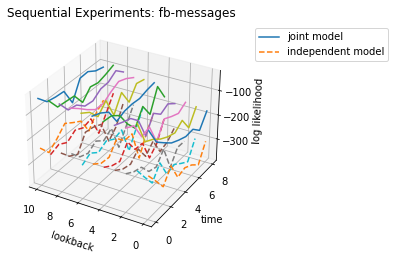

In [62]:
dataname = 'fb-messages'
p = 20

#lookbacks = [0, 1, 2, 3, 4, 5, 6, 10]
lookbacks = list(range(11))
args = ['ipynb',
        'use_mathtext',
        'colors5-light',
       ] if False else []

# rhos = dict()

with plt.style.context(args):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.ticklabel_format(style='plain')

    for lookback in lookbacks[::-1]:
        years = np.asarray(sorted(joint_grammars[lookback].keys()))
        joint_mdls = [joint_grammars[lookback][year].calculate_cost() for year in years]
        joint_lls = [joint_grammars[lookback][year].conditional_ll() for year in years]
        indep_mdls = [indep_grammars[lookback][year].calculate_cost() for year in years]
        indep_lls = [indep_grammars[lookback][year].conditional_ll() for year in years]
        
        # rho = stats.spearmanr(xs, yavg)
        # rhos[lookback] = round(rho.correlation, 4)

        ax.plot([lookback for _ in years], years, joint_lls)
        ax.plot([lookback for _ in years], years, indep_lls, linestyle='dashed')

    ax.set_title(f'Sequential Experiments: {dataname}')
    ax.set_xlabel('lookback')
    ax.set_ylabel('time')
    ax.set_zlabel('log likelihood')
    ax.legend(['joint model', 'independent model'], bbox_to_anchor=(1.75, 1))
    # ax.legend([f'lookback = {x}' for x in lookbacks], bbox_to_anchor=(1.2, 1.05))
    # ax.legend([f'lookback = {x}, rho = {rhos[x]}' for x in lookbacks], bbox_to_anchor=(1.2, 1.05))
    plt.gca().invert_xaxis()
    plt.savefig(f'../figures/experiment_sequential_{dataname}_joint_ll_3D.svg', bbox_inches='tight')
    

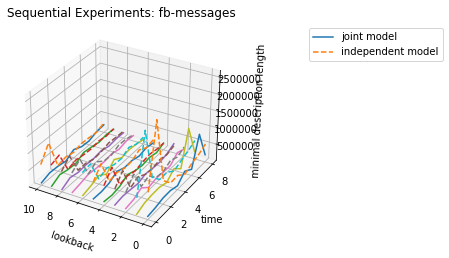

In [61]:
dataname = 'fb-messages'
p = 20

#lookbacks = [0, 1, 2, 3, 4, 5, 6, 10]
lookbacks = list(range(11))
args = ['ipynb',
        'use_mathtext',
        'colors5-light',
       ] if False else []

# rhos = dict()

with plt.style.context(args):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.ticklabel_format(style='plain')

    for lookback in lookbacks[::-1]:
        years = np.asarray(sorted(joint_grammars[lookback].keys()))
        joint_mdls = [joint_grammars[lookback][year].calculate_cost() for year in years]
        joint_lls = [joint_grammars[lookback][year].conditional_ll() for year in years]
        indep_mdls = [indep_grammars[lookback][year].calculate_cost() for year in years]
        indep_lls = [indep_grammars[lookback][year].conditional_ll() for year in years]
        
        # rho = stats.spearmanr(xs, yavg)
        # rhos[lookback] = round(rho.correlation, 4)

        ax.plot([lookback for _ in years], years, joint_mdls)
        ax.plot([lookback for _ in years], years, indep_mdls, linestyle='dashed')

    # plt.ticklabel_format(style='sci', axis='z', scilimits=(0,1000000))
    # ax.tick_params(axis='z', which='major', pad=-15)
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title(f'Sequential Experiments: {dataname}')
    ax.set_xlabel('lookback')
    ax.set_ylabel('time')
    ax.set_zlabel('minimal description length')
    ax.legend(['joint model', 'independent model'], bbox_to_anchor=(2, 1))
    # ax.legend([f'lookback = {x}' for x in lookbacks], bbox_to_anchor=(1.2, 1.05))
    # ax.legend([f'lookback = {x}, rho = {rhos[x]}' for x in lookbacks], bbox_to_anchor=(1.2, 1.05))
    plt.gca().invert_xaxis()
    plt.savefig(f'../figures/experiment_sequential_{dataname}_joint_mdl_3D.svg', bbox_inches='tight')

# 3D Plots: experiment 2

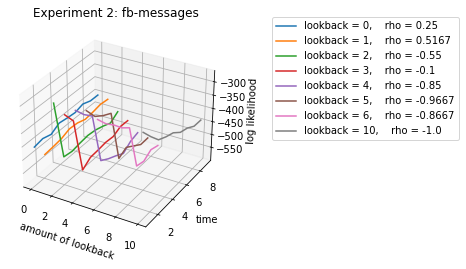

In [13]:
dataname = 'fb-messages'

lookbacks = [0, 1, 2, 3, 4, 5, 6, 10]
#lookbacks = list(range(11))
args = ['ipynb',
        'use_mathtext',
        'colors5-light',
       ] if False else []

rhos = dict()

with plt.style.context(args):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.ticklabel_format(style='plain')

    for lookback in lookbacks:
        with open(f'../results/{dataname}_{lookback}_exp2.lls', 'rb') as infile:
            loaded = pickle.load(infile)

            xs = np.asarray(sorted(loaded.keys()))
            ys = [loaded[x] for x in xs]
            #yavg = [np.mean(loaded[x]) for x in xs]
            #ymax = [np.max(loaded[x]) for x in xs]
            #ymin = [np.min(loaded[x]) for x in xs]
            
            rho = stats.spearmanr(xs, ys)
            rhos[lookback] = round(rho.correlation, 4)

            ax.plot([lookback for _ in xs], xs, ys)

    ax.set_title(f'Experiment 2: {dataname}')
    ax.set_xlabel('amount of lookback')
    ax.set_ylabel('time')
    ax.set_zlabel('log likelihood')
    ax.legend([f'lookback = {x},    rho = {rhos[x]}' for x in lookbacks], bbox_to_anchor=(2.1, 1.05))
    #plt.gca().invert_xaxis()
    plt.savefig(f'../figures/exp2_{dataname}_3D.svg', bbox_inches='tight')
    